# Bayesian Bandits

Notebook for analysis and simulation of Bayesian bandits


## Description

TODO: explain details here

## Simulation

General simulation set up

In [1]:
import numpy as np
import scipy.stats as stats
from BayesianBandits import *
from Bandit_functions import *

Simulation time and realizations

In [2]:
#Number of realizations
R=pow(10,2)
# Time instants to run
t_max=pow(10,3)

True bandit information

In [3]:
# Bandit configuration
K=3
# Bernoulli reward function
slow_factor=2 # Just to have less rewards
theta=stats.uniform.rvs(size=(K,1))/slow_factor
returns_expected=theta
reward_function={'dist':stats.bernoulli, 'args':(theta,), 'kwargs':{}}

Prior for the true bandit:

In [4]:
reward_prior={'dist': stats.beta, 'alpha': np.ones((K,1)), 'beta': np.ones((K,1))}

### Types of Bayesian bandit methods to evaluate: different methods

In [5]:
# Optimal bandit
optimal_bandit=OptimalBandit(K, reward_function)
# Probabilistic bandit
probabilistic_bandit=ProbabilisticBandit(K, reward_function)
# Bayesian bandits
M=100
# Monte Carlo Bayesian Bandit
mc_bandit=BayesianBanditMonteCarlo(K, reward_function, reward_prior, M)
# Numerical Bayesian Bandit
num_bandit=BayesianBanditNumerical(K, reward_function, reward_prior, M)
# Hybrid Monte Carlo Bayesian Bandit
hmc_bandit=BayesianBanditHybridMonteCarlo(K, reward_function, reward_prior, M)

# All bandits as a list
bandits=[optimal_bandit, probabilistic_bandit, mc_bandit, num_bandit, hmc_bandit]
bandits_labels=['Optimal', 'Probabilistic', 'Monte Carlo', 'Numerical', 'Hybrid Monte Carlo']
bandits_colors=['b', 'y', 'r', 'g', 'c']

Execute bandits

In [6]:
# Execution
bandits_returns, bandits_actions, bandits_predictive=execute_bandits(K, bandits, R, t_max)

Plot bandit results

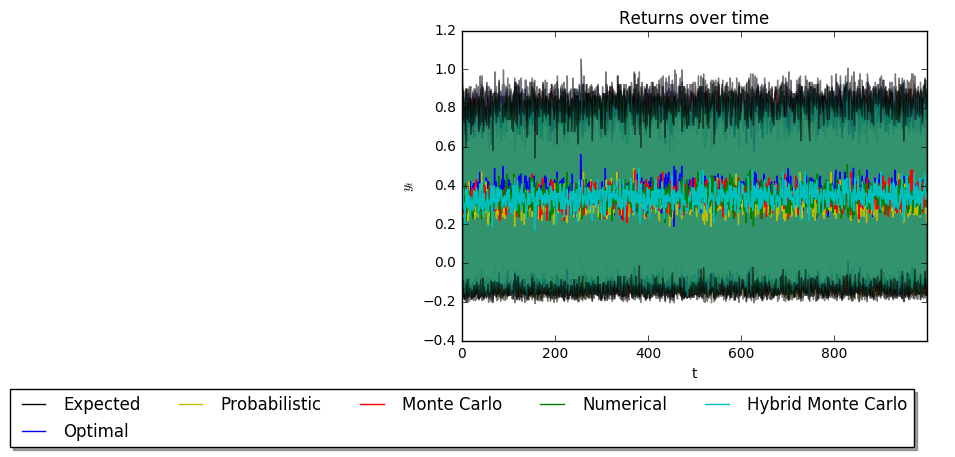

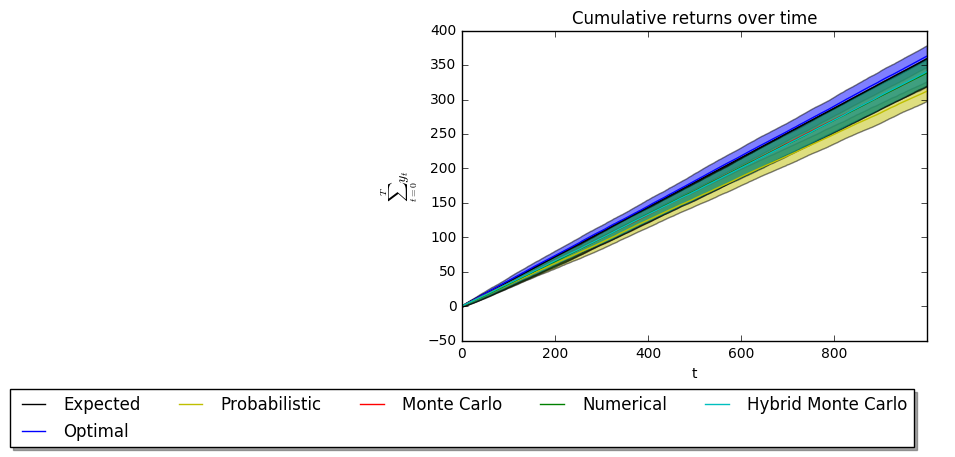

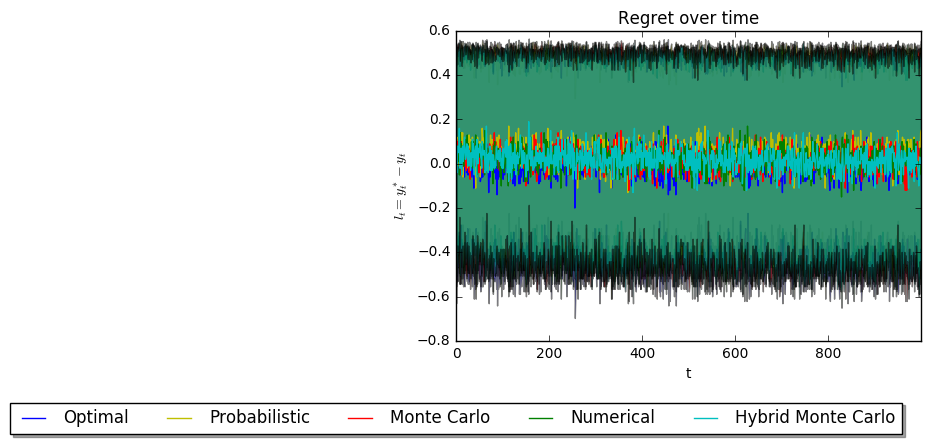

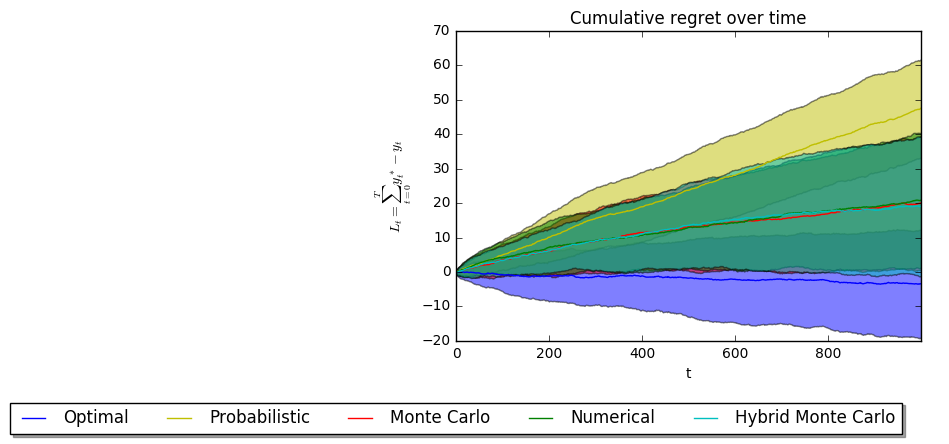

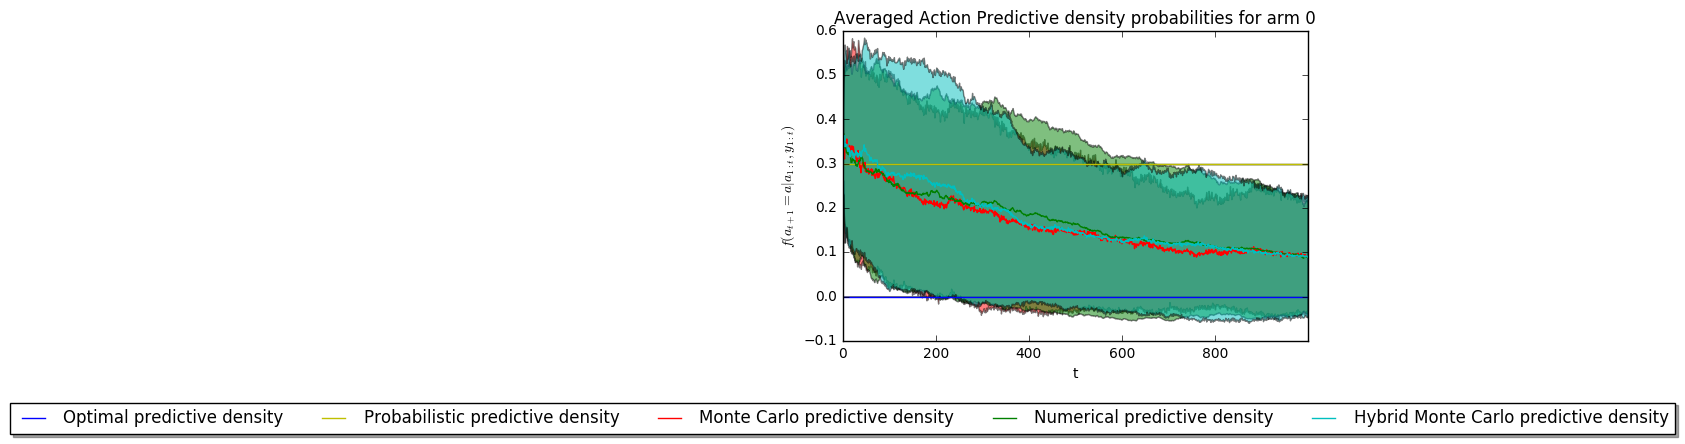

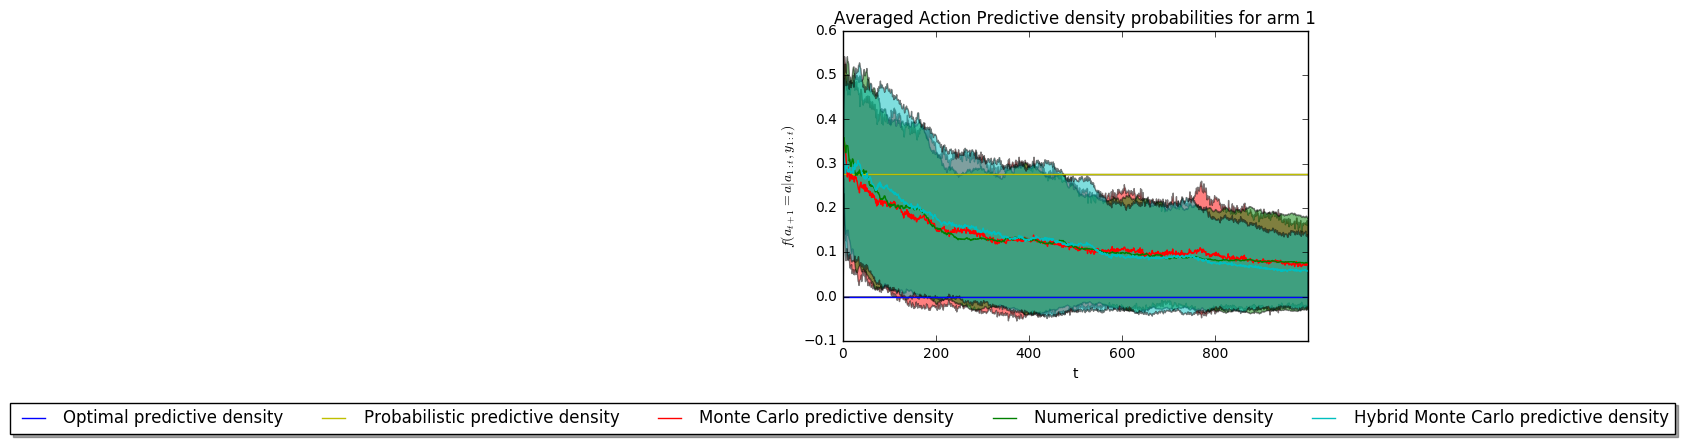

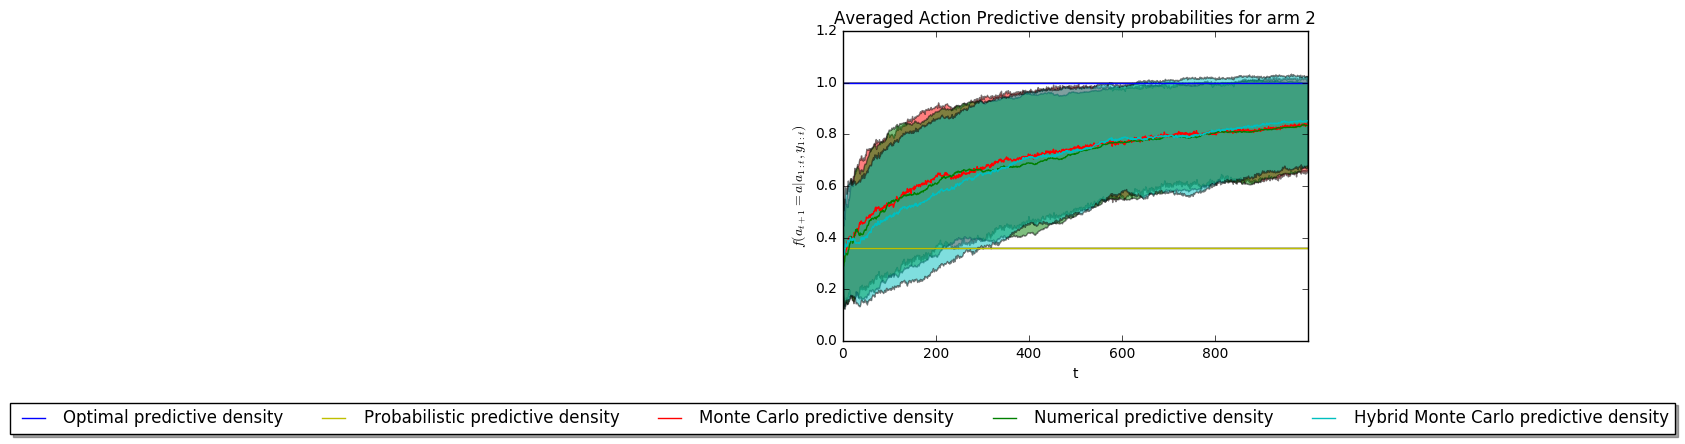

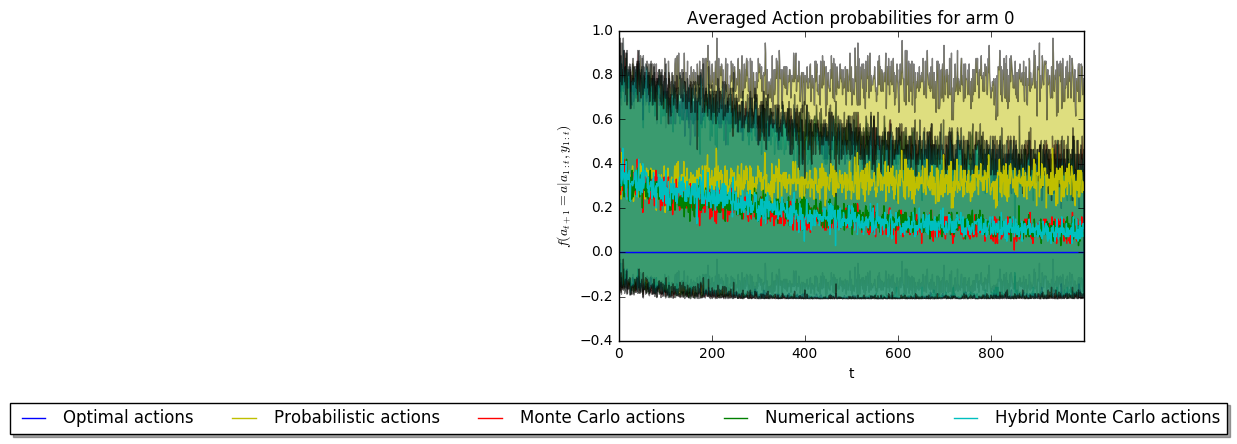

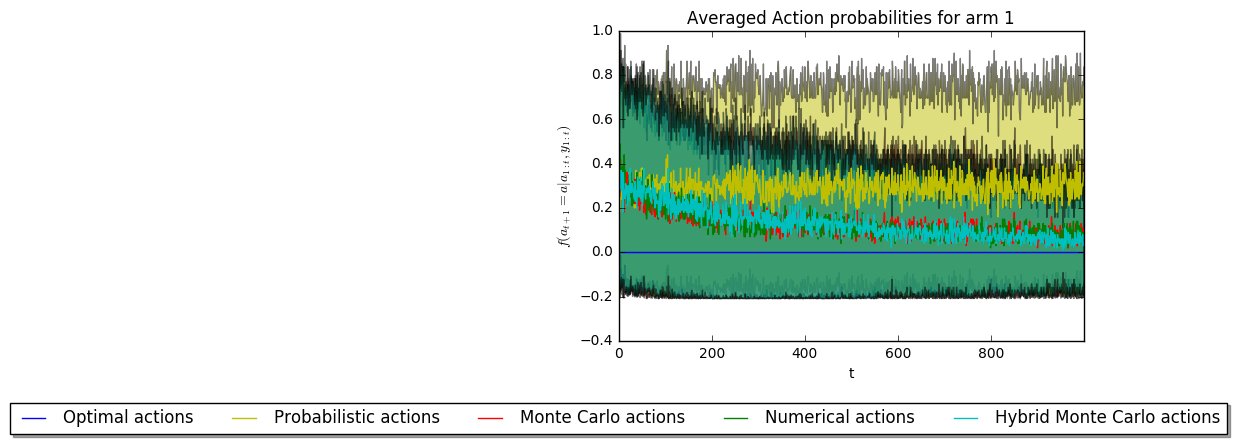

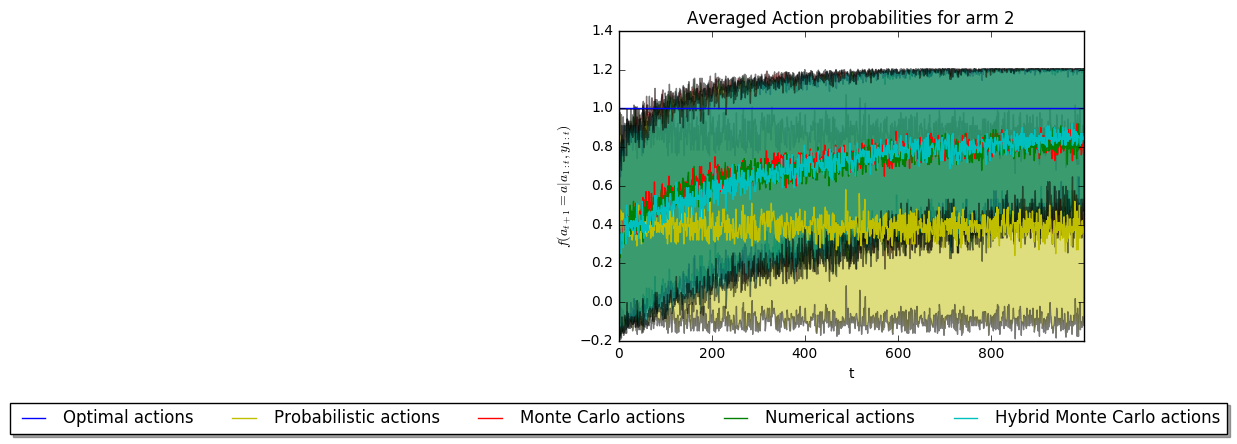

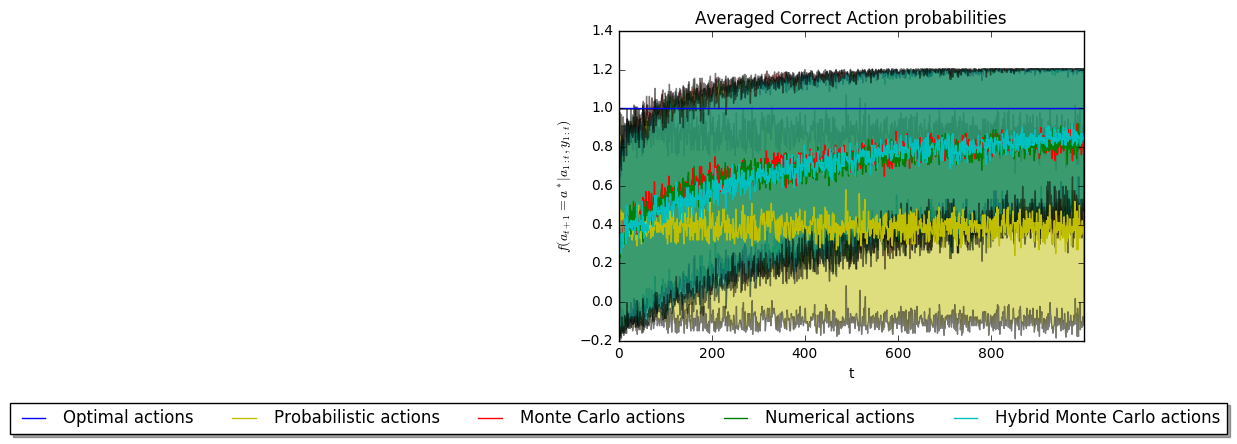

In [7]:
# Plotting time: all
t_plot=t_max
# Variance: True
plot_std=True
# Plot
plot_bandits(returns_expected, bandits_returns, bandits_actions, bandits_predictive, bandits_colors, bandits_labels, t_plot, plot_std)

### Types of Bayesian bandit methods to evaluate: different Monte Carlo samples

In [8]:
# Optimal bandit
optimal_bandit=OptimalBandit(K, reward_function)
# Probabilistic bandit
probabilistic_bandit=ProbabilisticBandit(K, reward_function)

# Bandits as a list
bandits=[optimal_bandit, probabilistic_bandit]
bandits_labels=['Optimal', 'Probabilistic']

# Monte Carlo Bayesian Bandits
M_samples=np.array([1, 100])
for n in np.arange(M_samples.size):
    bandits.append(BayesianBanditMonteCarlo(K, reward_function, reward_prior, M_samples[n]))
    bandits_labels.append('Monte Carlo M={}'.format(M_samples[n]))
    
# Bandits colors
bandits_colors=['b', 'y', 'g', 'r']


Execute bandits

In [9]:
# Execution
bandits_returns, bandits_actions, bandits_predictive=execute_bandits(K, bandits, R, t_max)

Plot bandit results

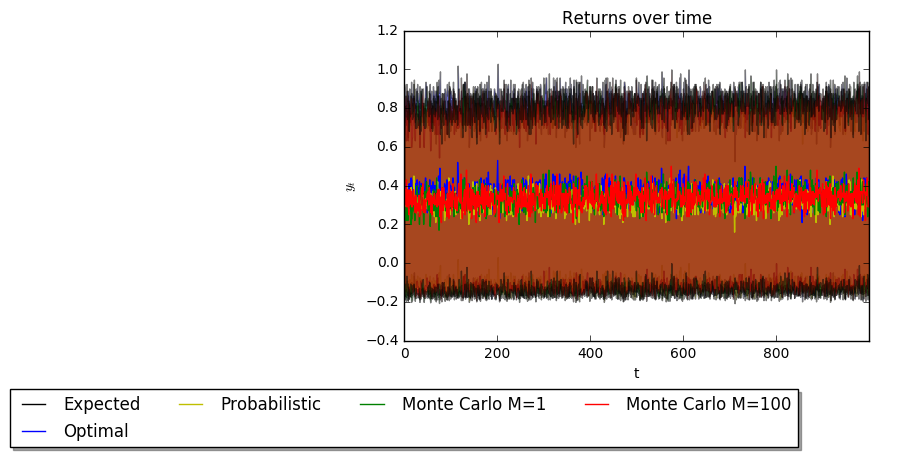

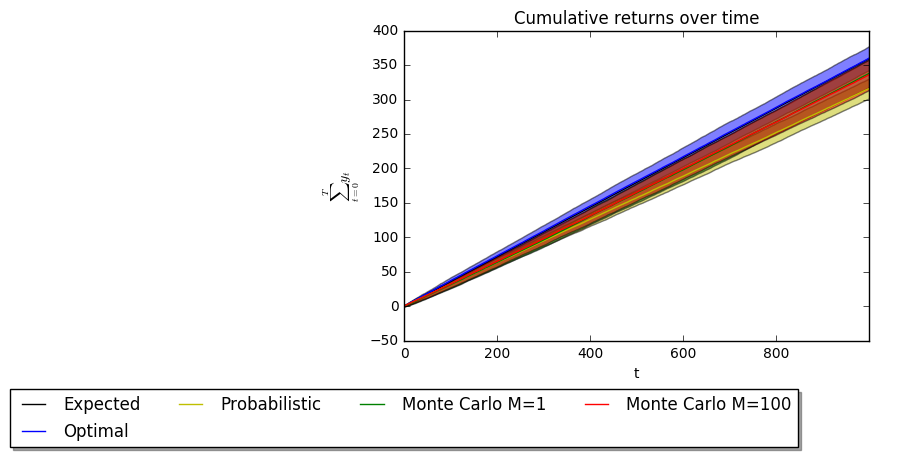

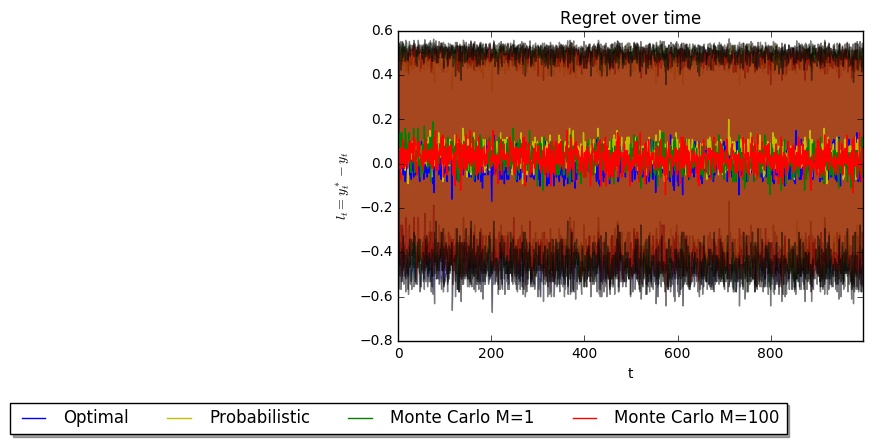

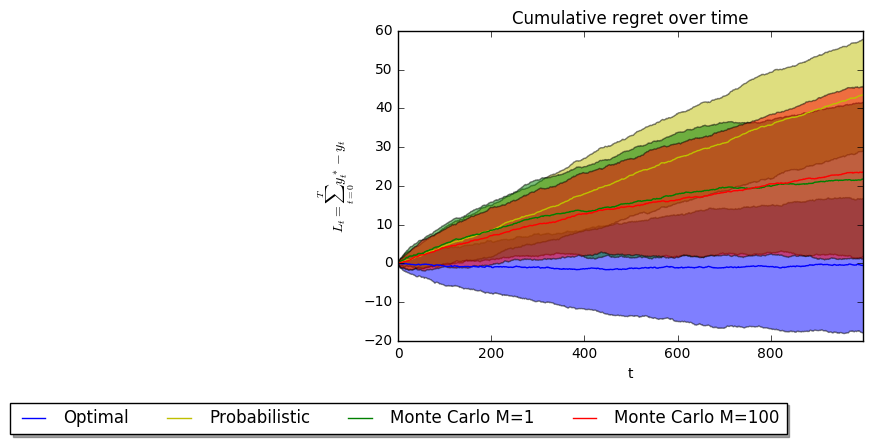

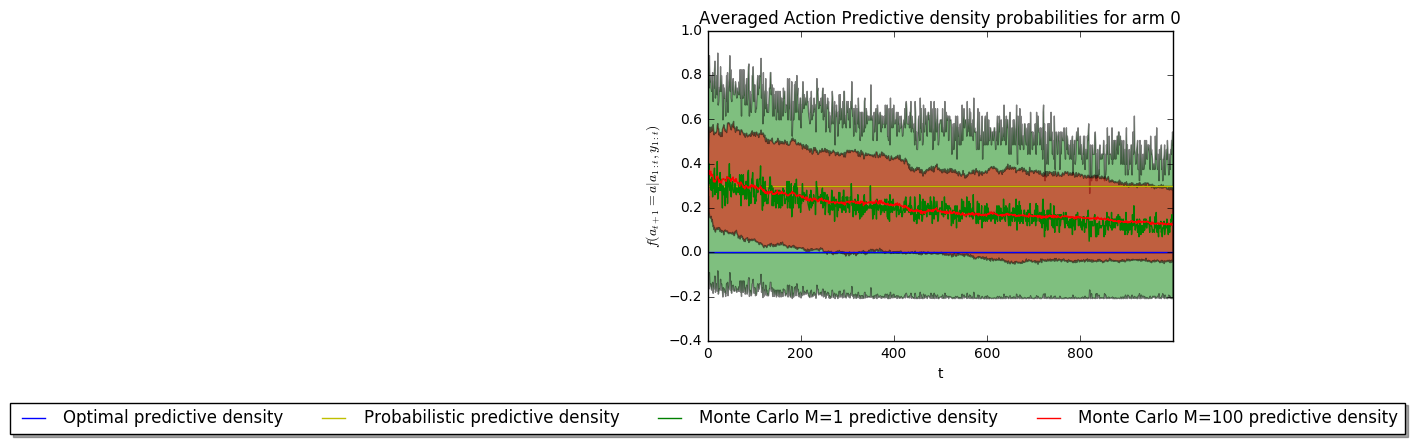

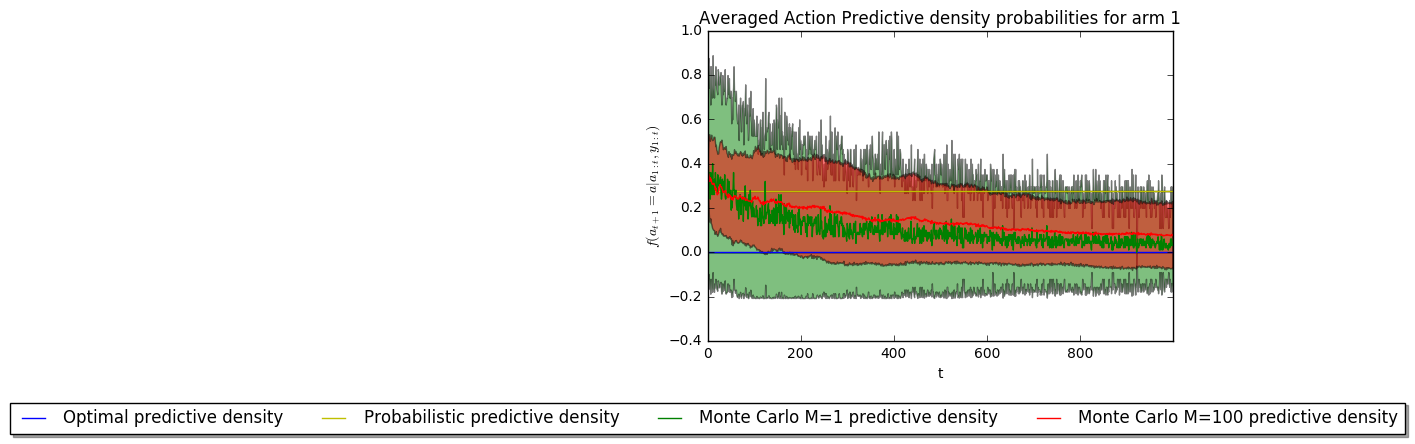

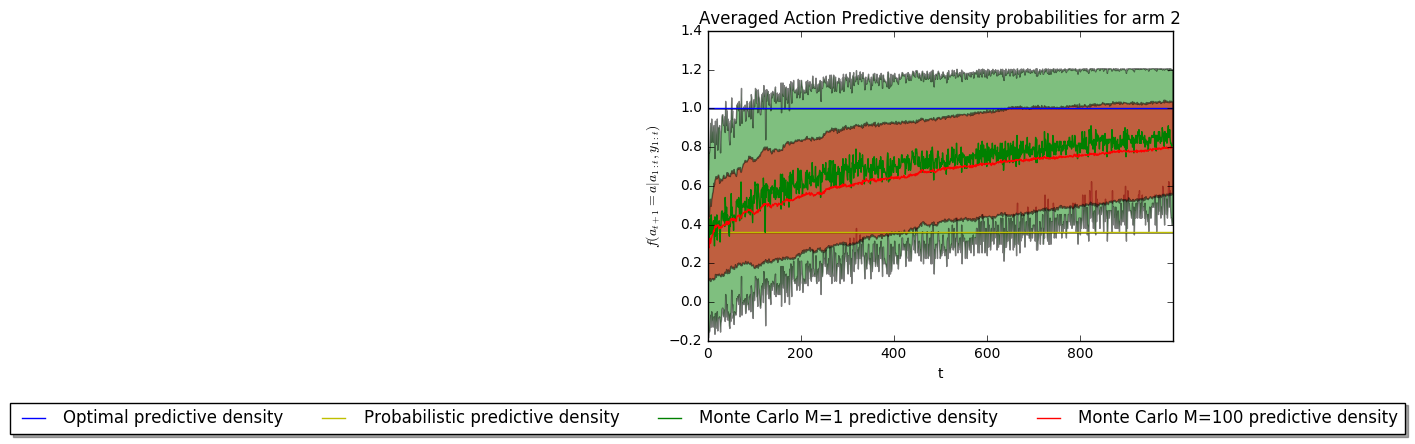

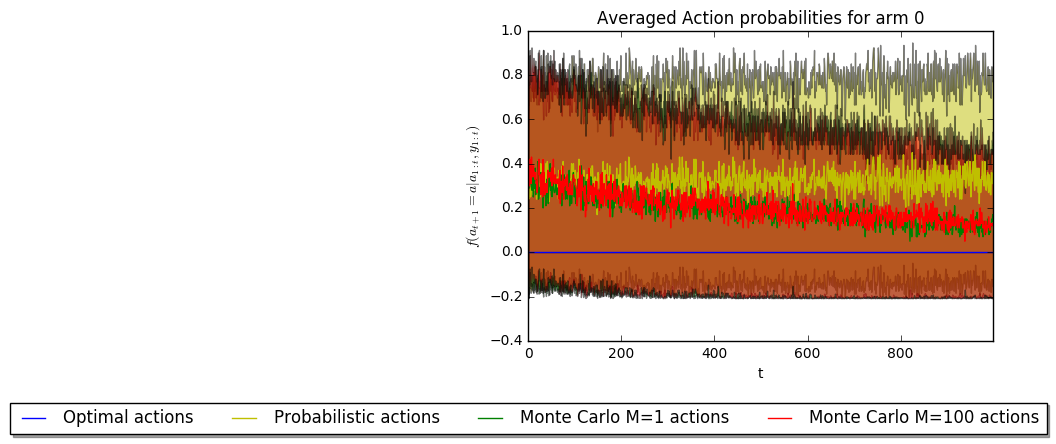

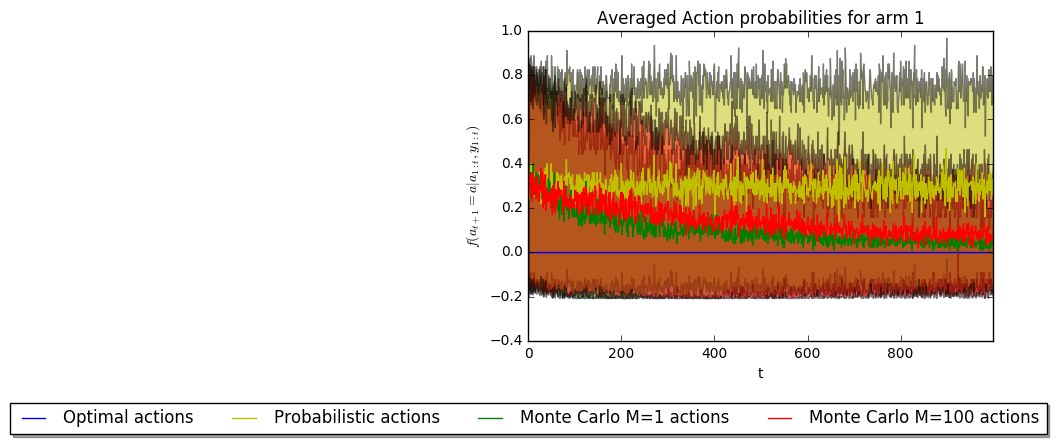

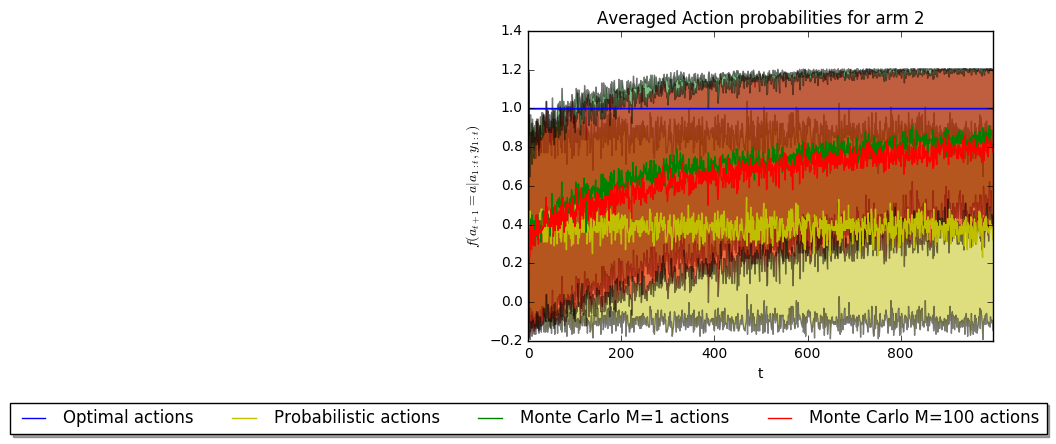

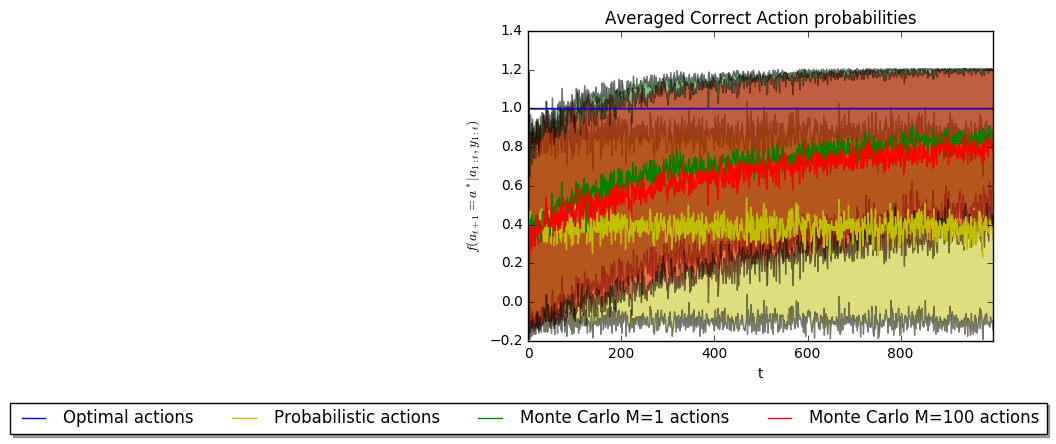

In [10]:
# Plotting time: all
t_plot=t_max
# Variance: True
plot_std=True
# Plot
plot_bandits(returns_expected, bandits_returns, bandits_actions, bandits_predictive, bandits_colors, bandits_labels, t_plot, plot_std)